In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
dataset = pd.read_csv("../input/cottonprices/cotton-prices-historical-chart-data.csv")

In [ ]:
dataset.info()

In [ ]:
training_set = dataset.iloc[:9898].values
test_set = dataset.iloc[9898:].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
model_json = regressor.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
regressor.save_weights("model.h5")

In [ ]:
from keras.models import model_from_json
# load json and create model
json_file = open('../input/trained-values/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor = model_from_json(loaded_model_json)
# load weights into new model
regressor.load_weights("../input/trained-values/model.h5")
print("Loaded model from disk")

In [ ]:
X_test = []
dataset = dataset.iloc[:].values
for i in range(len(training_set), len(dataset)):
    X_test.append(dataset[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_test_values = regressor.predict(X_test)
predicted_test_values = sc.inverse_transform(predicted_test_values)

In [ ]:
predicted_test_values = predicted_test_values

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

In [ ]:
predicted_test_values = predicted_test_values-1

In [ ]:
# Visualising the results by subtracting 1
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

# **Changing the optimizer**

In [ ]:
regressor2 = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor2.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the RNN
regressor2.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [ ]:
from keras.models import model_from_json
# load json and create model
json_file = open('../input/model2/model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor2 = model_from_json(loaded_model_json)
# load weights into new model
regressor2.load_weights("../input/model2/model2.h5")
print("Loaded model from disk")

In [ ]:
# Fitting the RNN to the Training set
regressor2.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
model_json = regressor2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
regressor2.save_weights("model2.h5")

In [ ]:
X_test2 = []
dataset = dataset.iloc[:].values
for i in range(len(training_set), len(dataset)):
    X_test2.append(dataset[i-60:i, 0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))

In [ ]:
predicted_test_values2 = regressor2.predict(X_test2)
predicted_test_values2 = sc.inverse_transform(predicted_test_values2)

In [ ]:
predicted_test_values2 = predicted_test_values2

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values2, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

In [ ]:
predicted_test_values2 = predicted_test_values2-1

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values2, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

# Version 2

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [6]:
df = pd.read_csv("../input/cottonprices/cotton-prices-historical-chart-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 1 columns):
 value    11898 non-null float64
dtypes: float64(1)
memory usage: 93.1 KB


In [3]:
df.shape

(11898, 1)

 value    0.2673
Name: 0, dtype: float64


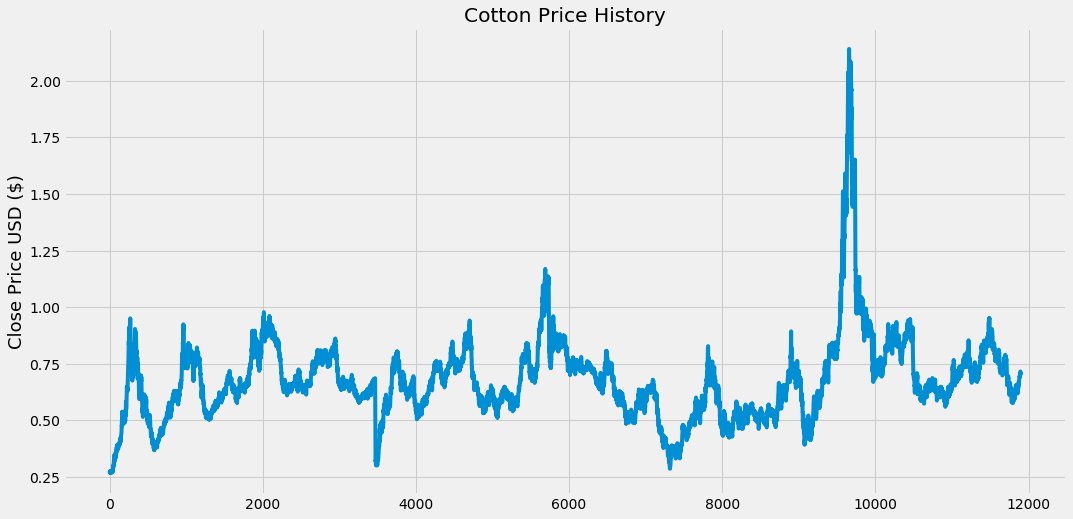

In [13]:
plt.figure(figsize=(16,8))
plt.title('Cotton Price History')
plt.plot(df)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [16]:
#Create a new dataframe with only the 'Close' column
data = df#Converting the dataframe to a numpy array
dataset = data.values#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [17]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [18]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [19]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [21]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [22]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
#Train the model
model.fit(x_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
9459/9459 [==============================] - 109s 12ms/step - loss: 4.3916e-05
Epoch 2/10
9459/9459 [==============================] - 108s 11ms/step - loss: 4.7936e-05
Epoch 3/10
9459/9459 [==============================] - 108s 11ms/step - loss: 4.3979e-05
Epoch 4/10
9459/9459 [==============================] - 109s 11ms/step - loss: 4.5708e-05
Epoch 5/10
9459/9459 [==============================] - 108s 11ms/step - loss: 4.2708e-05
Epoch 6/10
9459/9459 [==============================] - 108s 11ms/step - loss: 4.5168e-05
Epoch 7/10
9459/9459 [==============================] - 108s 11ms/step - loss: 4.0955e-05
Epoch 8/10
9459/9459 [==============================] - 107s 11ms/step - loss: 4.1428e-05
Epoch 9/10
9459/9459 [==============================] - 109s 12ms/step - loss: 3.8966e-05
Epoch 10/10
9459/9459 [==============================] - 108s 11ms/step - loss: 4.0779e-05


In [25]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model2.h5")

In [26]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [27]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [28]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [29]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [30]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.020744174831112128

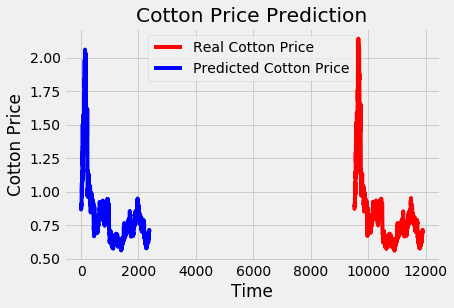

In [35]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(data[training_data_len:], color = 'red', label = 'Real Cotton Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


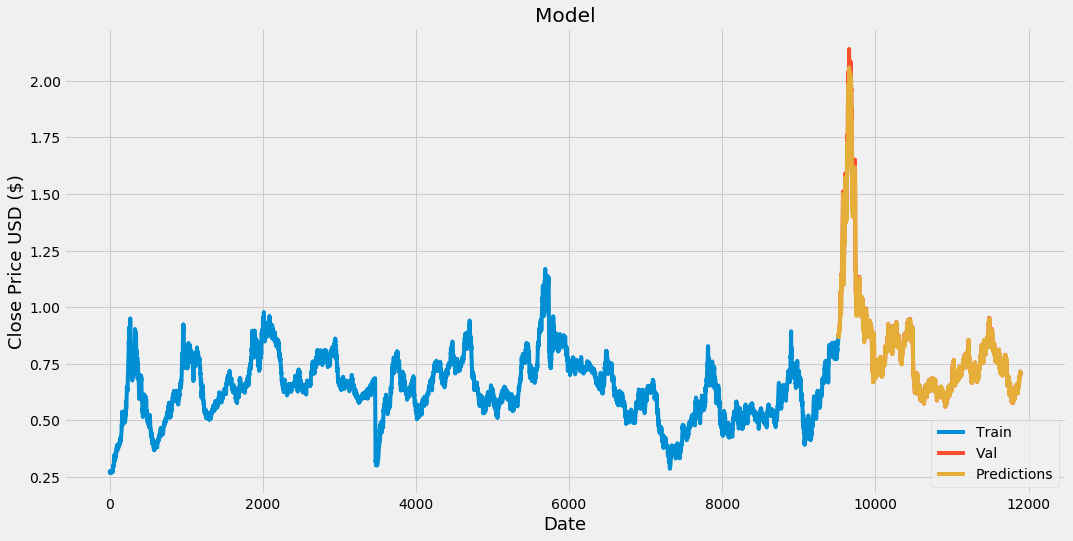

In [36]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
#Show the valid and predicted prices
valid

,value,Predictions
9519,0.8742,0.874526
9520,0.8798,0.870219
9521,0.8715,0.877589
9522,0.8765,0.866661
9523,0.8842,0.874479
...,...,...
11893,0.7153,0.713173
11894,0.7138,0.714829
11895,0.7032,0.712869
11896,0.7022,0.701335
